<a href="https://colab.research.google.com/github/ndViet27/KPDL_Nhom3_Clustering1/blob/main/KMeans_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load dữ liệu từ Drive

In [15]:
# prompt: import csv file from drive

from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file and the path to it in your Google Drive.
# Example: '/content/drive/MyDrive/Colab Notebooks/your_file.csv'
df = pd.read_csv('https://raw.githubusercontent.com/ndViet27/KPDL_Nhom3_Clustering1/refs/heads/main/diabetes.csv')

# Now you can work with the DataFrame 'df'
df.head(10)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Phân tích dữ liệu

##Chuyển cột Outcome từ Int64 sang Category

In [16]:
df['Outcome'] = df['Outcome'].astype('category', copy=False)

def convert_outcome(x):
  if x == 0:
    return 'Non-Diabetic'
  else:
    return 'Diabetic'

df['Outcome'] = df['Outcome'].apply(convert_outcome)

df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [17]:
for column in df.columns:
    zero_count = (df[column] == 0).sum()
    print(f"Number of 0 values in '{column}': {zero_count}")


Number of 0 values in 'Pregnancies': 111
Number of 0 values in 'Glucose': 5
Number of 0 values in 'BloodPressure': 35
Number of 0 values in 'SkinThickness': 227
Number of 0 values in 'Insulin': 374
Number of 0 values in 'BMI': 11
Number of 0 values in 'DiabetesPedigreeFunction': 0
Number of 0 values in 'Age': 0
Number of 0 values in 'Outcome': 0


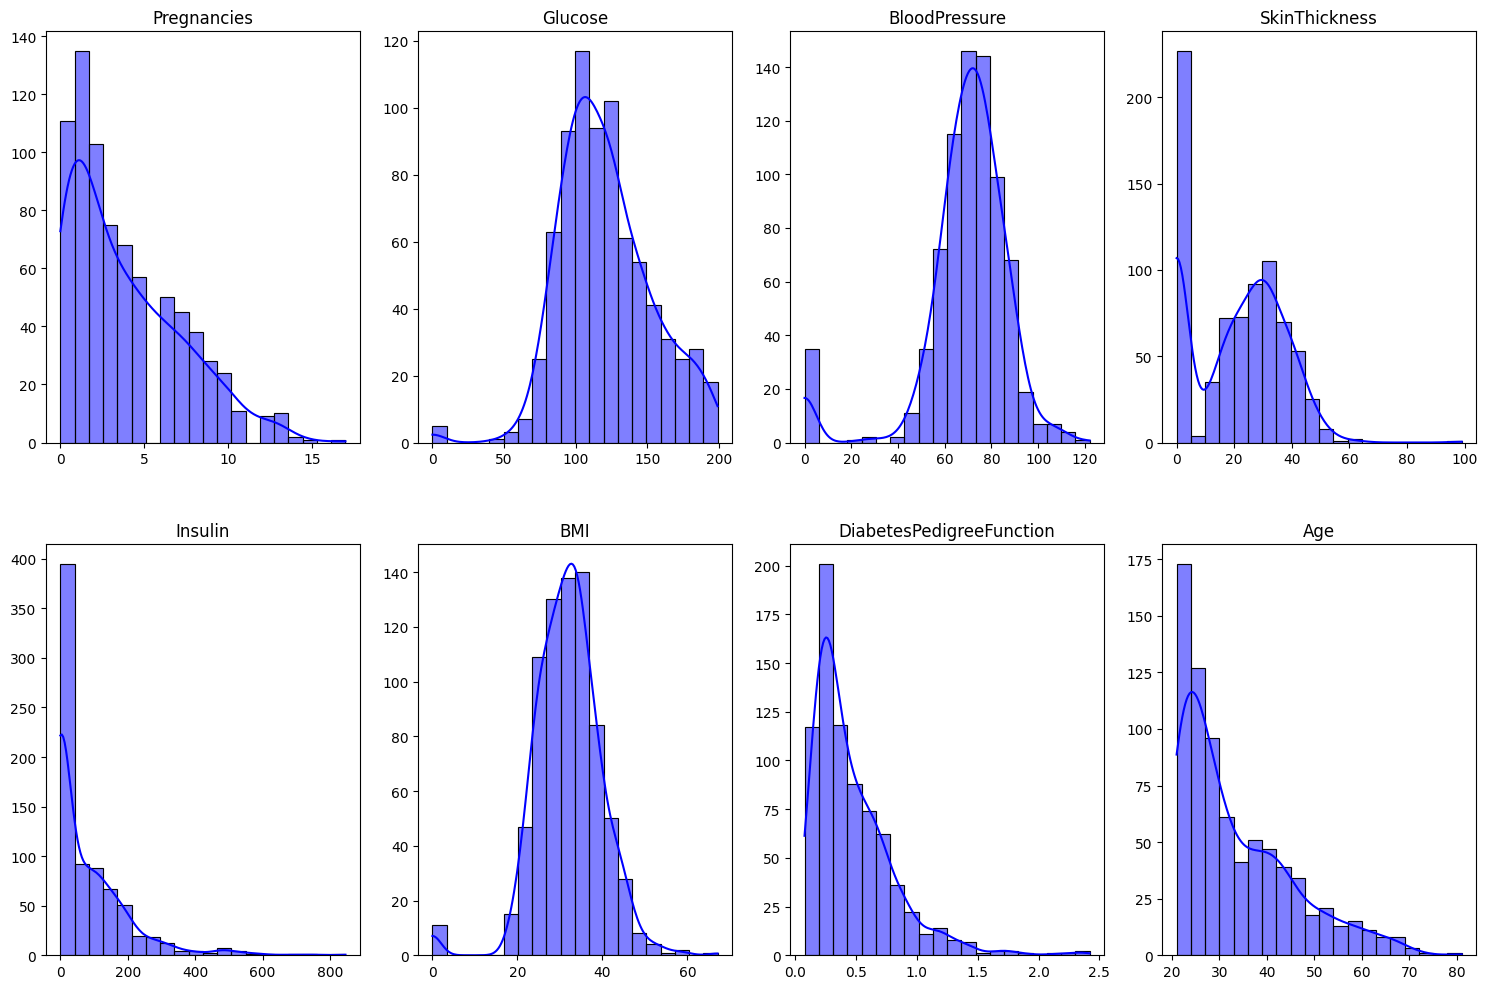

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[column], bins=20, kde=True, color='blue')
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout(h_pad=4.0)
plt.show()

# Thuật toán KMeans

In [34]:
import numpy as np

def euclidean_distance(a, b):
  """Calculates the Euclidean distance between two points."""
  return np.sqrt(np.sum((a - b) ** 2))

def kmeans_algo(data, k, max_iterations=100):
  """Performs K-means clustering."""
  # 1. Initialize centroids randomly
  np.random.seed(42)
  centroids = data[np.random.choice(len(data), k, replace=False)]

  for _ in range(max_iterations):
    # 2. Assign each data point to the nearest centroid
    clusters = [[] for _ in range(k)]
    cluster_labels = []*len(data)

    for point in data:
      distances = [euclidean_distance(point, centroid) for centroid in centroids]
      cluster_index = distances.index(min(distances))
      cluster_labels.append(cluster_index)
      clusters[cluster_index].append(point)

    # 3. Update centroids
    new_centroids = []
    for cluster in clusters:
      if cluster:  # Check if the cluster is not empty
        new_centroid = np.mean(cluster, axis=0)
        new_centroids.append(new_centroid)
      else:
        # Handle empty clusters by keeping the old centroid
        new_centroids.append(centroids[clusters.index(cluster)])

    # 4. Check for convergence
    if np.array_equal(new_centroids, centroids):
      break
    centroids = new_centroids

  return clusters, centroids, cluster_labels

# Phân cụm KMeans với Glucose và BMI

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

cluster_cols = ['Glucose', 'BMI']
#create subset
X = np.array(df[cluster_cols])
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)


[[ 0.84832379  0.20401277]
 [-1.12339636 -0.68442195]
 [ 1.94372388 -1.10325546]
 ...
 [ 0.00330087 -0.73518964]
 [ 0.1597866  -0.24020459]
 [-0.8730192  -0.20212881]]


##Chọn k tối ưu bằng silhouette

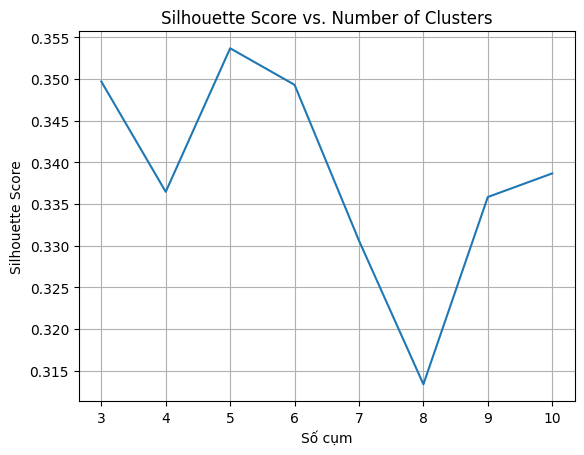

In [39]:
silhouette_scores = []
for i in range(3, 11):  # Số cụm tối thiểu là 2
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X_scaled)

#Tính Silhouette Score cho mỗi trường hợp k khác nhau
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

#Vẽ đồ thị Silhouette Score
plt.plot(range(3, 11), silhouette_scores)
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Số cụm')
plt.ylabel('Silhouette Score')
# plt.xticks(range(3, 11))
plt.grid(True)
plt.show()

### Biểu đồ

In [ ]:
import matplotlib.cm as cm
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


for n_clusters in range(5,6):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_scaled[:, 0], X_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Phân cụm

In [44]:
best_cluster_number = 5
kmeans = KMeans(n_clusters=best_cluster_number, random_state=42)
kmeans.fit(X_scaled)
centroids = kmeans.cluster_centers_
print(centroids)
print('\n')

clusters, centroids, cluster_labels = kmeans_algo(X_scaled, best_cluster_number)
print(np.array(centroids))


[[ 0.78351657  1.46589775]
 [-0.55605767 -0.78529999]
 [ 1.22537988 -0.07709825]
 [-0.57798795  0.45859472]
 [-0.52021501 -4.06047387]]


[[-0.94514653  0.37790673]
 [ 0.54909969  1.44556767]
 [ 0.14114438 -0.20245991]
 [-0.74225715 -1.26555561]
 [ 1.6361096   0.09824673]]


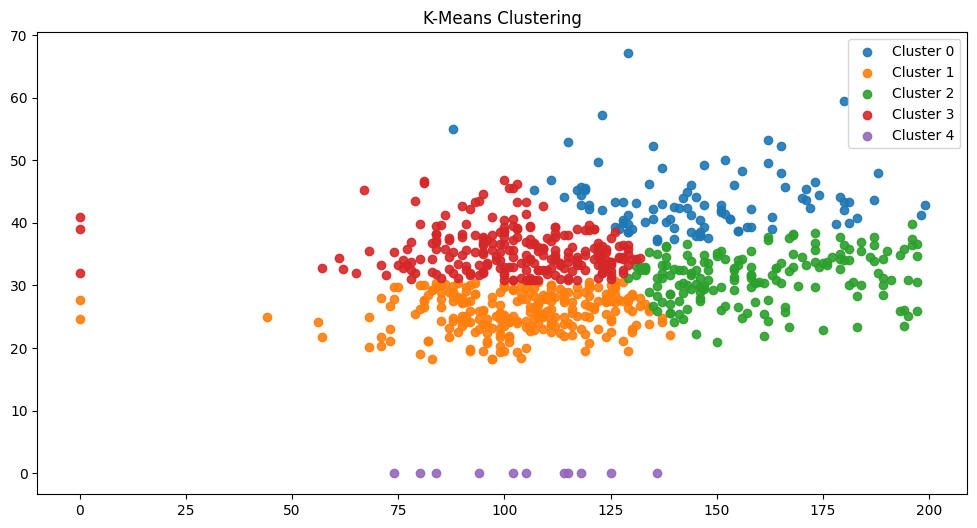

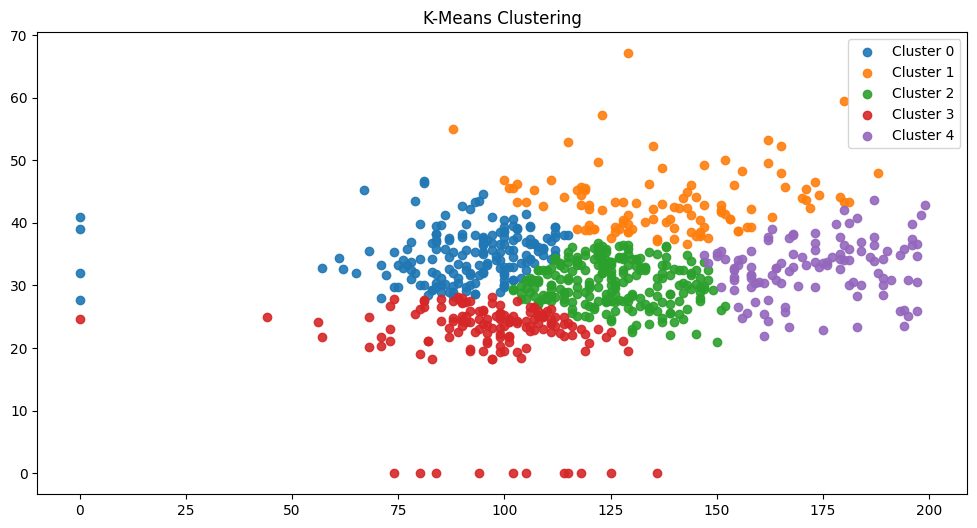

In [45]:
import matplotlib.pyplot as plt

def drawplt(data, centroids, labels):
    plt.figure(figsize=(12, 6))
    plt.title("K-Means Clustering")
    for cluster_id in range(len(centroids)):
        cluster_points = data[np.array(labels) == cluster_id] #lấy ra các điểm thuộc cụm đang xét
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', alpha=0.9)
    # plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', label='Centroid', s=200, alpha=0.75)
    plt.legend()
    plt.show()

drawplt(X, centroids, kmeans.labels_)
drawplt(X, centroids, cluster_labels)


## Biểu diễn toàn bộ các thuộc tính của các cụm vừa tìm được




In [50]:
df_numeric = df.drop('Outcome', axis=1)
df_numeric['Cluster'] = kmeans.labels_
# df_numeric.head()
df_numeric.groupby('Cluster').mean().reset_index()


,Cluster,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,3.929293,145.929293,73.676768,27.292929,131.010101,43.542424,0.608242,33.232323
1,1,3.346614,103.127490,64.892430,14.565737,49.980080,25.805179,0.439183,30.637450
2,2,4.785714,160.047619,72.291667,19.857143,118.761905,31.385119,0.487649,38.869048
3,3,3.669456,102.426778,71.251046,25.238494,65.815900,35.605858,0.440414,32.150628
4,4,3.909091,104.272727,28.818182,4.181818,8.090909,0.000000,0.433273,30.454545


In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=8, cols=1, subplot_titles=('<b>Pregnancies in clusters</b>',
                                                    '<b>Glucose in clusters</b>',
                                                    '<b>Blood Pressure in clusters</b>',
                                                    '<b>Skin Thickness in clusters</b>',
                                                    '<b>Insulin in clusters</b>',
                                                    '<b>BMI in clusters</b>',
                                                    '<b>Diabetes Pedigree Func. in clusters</b>',
                                                    '<b>Age in clusters</b>'
                                                   ))

fig.add_trace(go.Box(y=df_numeric['Pregnancies'], x=df_numeric['Cluster']), row=1, col=1)
fig.add_trace(go.Box(y=df_numeric['Glucose'], x=df_numeric['Cluster']), row=2, col=1)
fig.add_trace(go.Box(y=df_numeric['BloodPressure'], x=df_numeric['Cluster']), row=3, col=1)
fig.add_trace(go.Box(y=df_numeric['SkinThickness'], x=df_numeric['Cluster']), row=4, col=1)
fig.add_trace(go.Box(y=df_numeric['Insulin'], x=df_numeric['Cluster']), row=5, col=1)
fig.add_trace(go.Box(y=df_numeric['BMI'], x=df_numeric['Cluster']), row=6, col=1)
fig.add_trace(go.Box(y=df_numeric['DiabetesPedigreeFunction'], x=df_numeric['Cluster']), row=7, col=1)
fig.add_trace(go.Box(y=df_numeric['Age'], x=df_numeric['Cluster']), row=8, col=1)


# Update visual layout
fig.update_layout(
    showlegend=False,
    width=1000,
    height=900,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

In [52]:
df['Cluster'] = kmeans.labels_

# Calculate percentage outcome within each cluster
cluster_outcome_percent = df.groupby('Cluster')['Outcome'].value_counts(normalize=True).mul(100).round(1)

# Print the result
cluster_outcome_percent.unstack(fill_value=0).T

Cluster,0,1,2,3,4
Outcome,,,,,
Non-Diabetic,34.3,87.6,36.3,73.6,81.8
Diabetic,65.7,12.4,63.7,26.4,18.2


# KMeans trên tất cả các thuộc tính

In [53]:
data = np.array(df_numeric.drop('Cluster', axis=1))
data_scaled = StandardScaler().fit_transform(data)

print(data_scaled)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [54]:
from sklearn.decomposition import PCA

def reduce_dimensions(data, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(np.array(data))

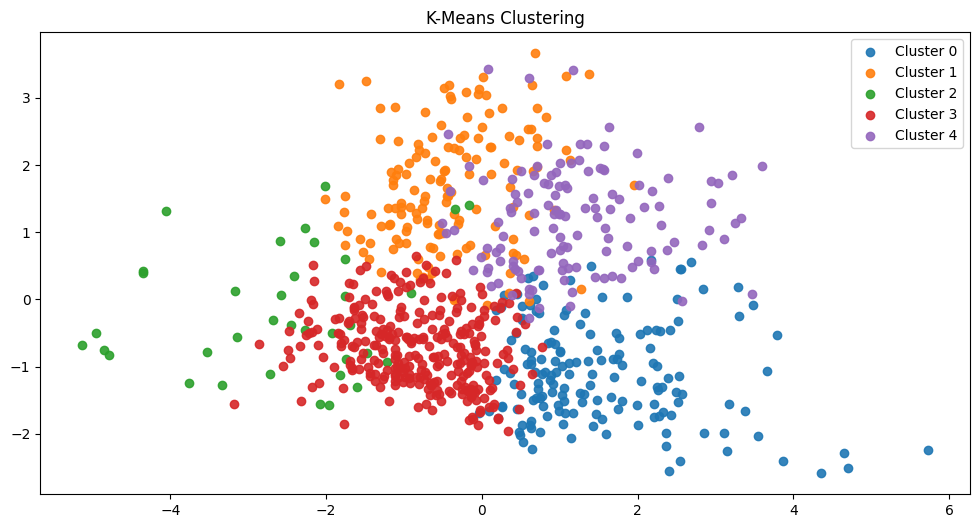

In [57]:
kmeans_all = KMeans(n_clusters=best_cluster_number, random_state=42)
kmeans_all.fit(data_scaled)
centroids_all = kmeans_all.cluster_centers_

drawplt(reduce_dimensions(data_scaled), reduce_dimensions(centroids_all), kmeans_all.labels_)

In [58]:
df_numeric['Cluster'] = kmeans_all.labels_
df_numeric.groupby('Cluster').mean().reset_index()

,Cluster,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,2.093168,142.000000,72.770186,34.732919,214.919255,37.434161,0.604062,29.006211
1,1,5.858108,130.033784,77.560811,0.662162,0.000000,31.524324,0.397054,43.668919
2,2,3.555556,117.000000,0.666667,2.000000,0.694444,25.763889,0.393167,30.444444
3,3,1.996599,100.863946,67.268707,19.853741,49.091837,29.171429,0.416735,25.397959
4,4,8.015504,130.806202,78.116279,32.348837,94.775194,33.906202,0.540380,45.217054


In [59]:
df['Cluster'] = kmeans_all.labels_

# Calculate percentage outcome within each cluster
cluster_outcome_percent = df.groupby('Cluster')['Outcome'].value_counts(normalize=True).mul(100).round(1)

# Print the result
cluster_outcome_percent.unstack(fill_value=0).T

Cluster,0,1,2,3,4
Outcome,,,,,
Non-Diabetic,48.4,55.4,55.6,89.5,44.2
Diabetic,51.6,44.6,44.4,10.5,55.8
